In [2]:
# Import basic libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Show plots inside the notebook
%matplotlib inline
# Load the cleaned dataset
df = pd.read_csv('../data/processed/cleaned_air_quality_data.csv')
df.head()


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,0.00,0.02,0.00,166.463581,NaN
1,Ahmedabad,2015-01-02,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,3.68,5.50,3.77,166.463581,NaN
2,Ahmedabad,2015-01-03,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,6.80,16.40,2.25,166.463581,NaN
3,Ahmedabad,2015-01-04,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,4.43,10.14,1.00,166.463581,NaN
4,Ahmedabad,2015-01-05,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,7.01,18.89,2.78,166.463581,NaN


In [3]:
# Structure and types
df.info()

# Summary statistics
df.describe()

# Null values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       29531 non-null  float64
 3   PM10        29531 non-null  float64
 4   NO          29531 non-null  float64
 5   NO2         29531 non-null  float64
 6   NOx         29531 non-null  float64
 7   NH3         29531 non-null  float64
 8   CO          29531 non-null  float64
 9   SO2         29531 non-null  float64
 10  O3          29531 non-null  float64
 11  Benzene     29531 non-null  float64
 12  Toluene     29531 non-null  float64
 13  Xylene      29531 non-null  float64
 14  AQI         29531 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


City             0
Date             0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3              0
CO               0
SO2              0
O3               0
Benzene          0
Toluene          0
Xylene           0
AQI              0
AQI_Bucket    4681
dtype: int64

In [4]:
# Check column names to plan your visualizations
df.columns


Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

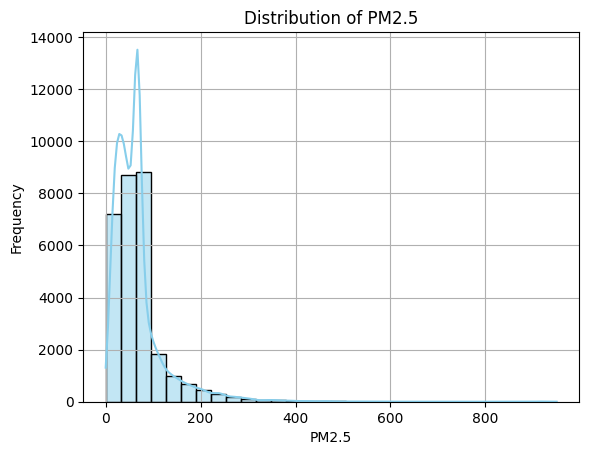

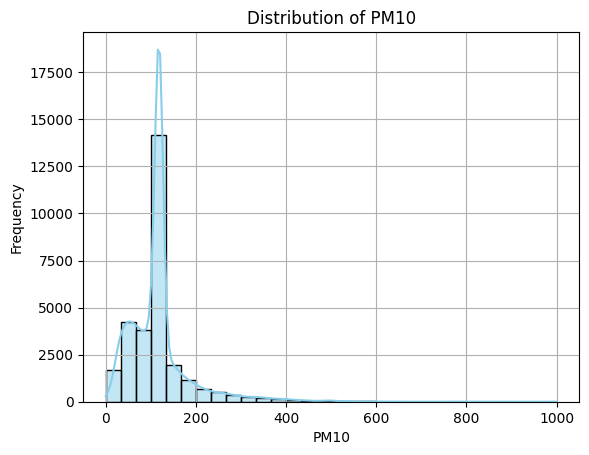

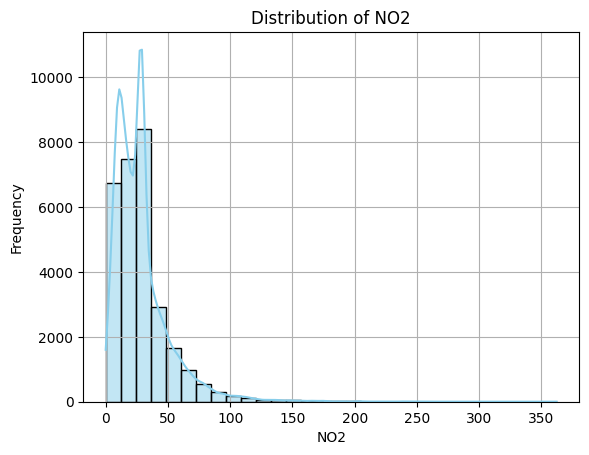

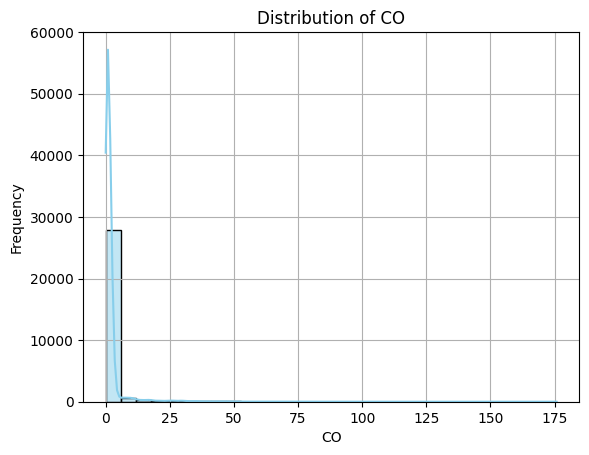

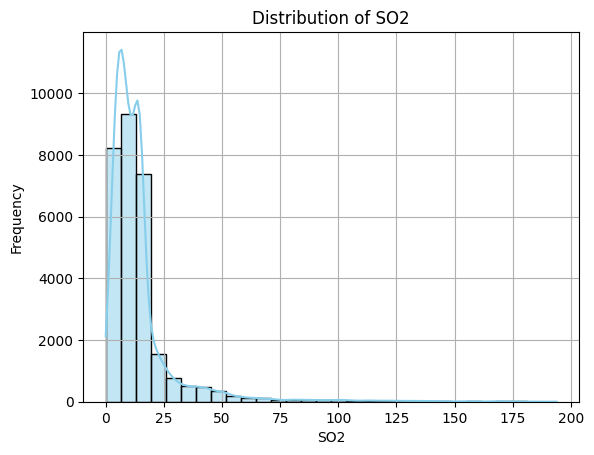

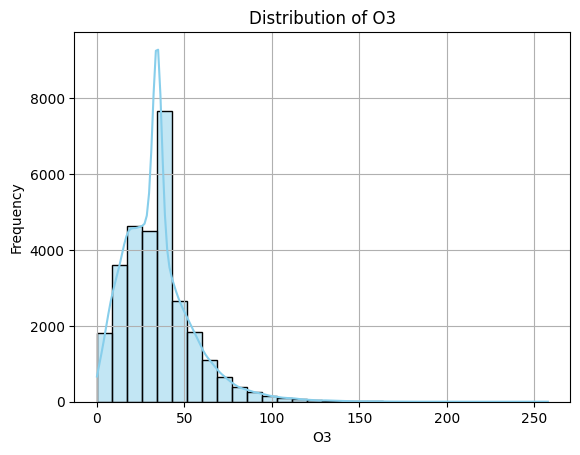

In [5]:
# Replace below with actual pollutant columns from your dataset
pollutants = ['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3']  

for pollutant in pollutants:
    if pollutant in df.columns:
        sns.histplot(df[pollutant], kde=True, bins=30, color='skyblue')
        plt.title(f'Distribution of {pollutant}')
        plt.xlabel(pollutant)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()


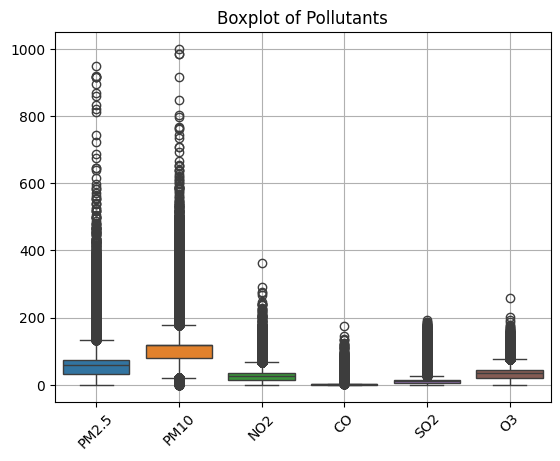

In [6]:
# Filter valid columns
plot_cols = [col for col in pollutants if col in df.columns]

sns.boxplot(data=df[plot_cols])
plt.title('Boxplot of Pollutants')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


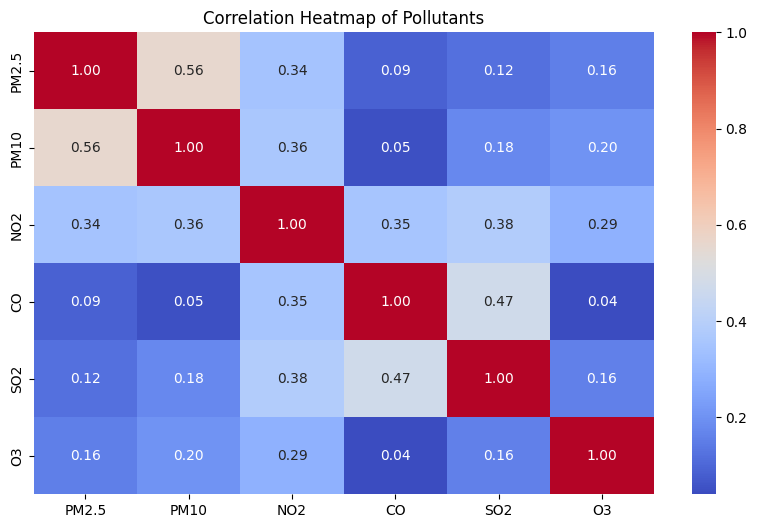

In [7]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[plot_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Pollutants')
plt.show()


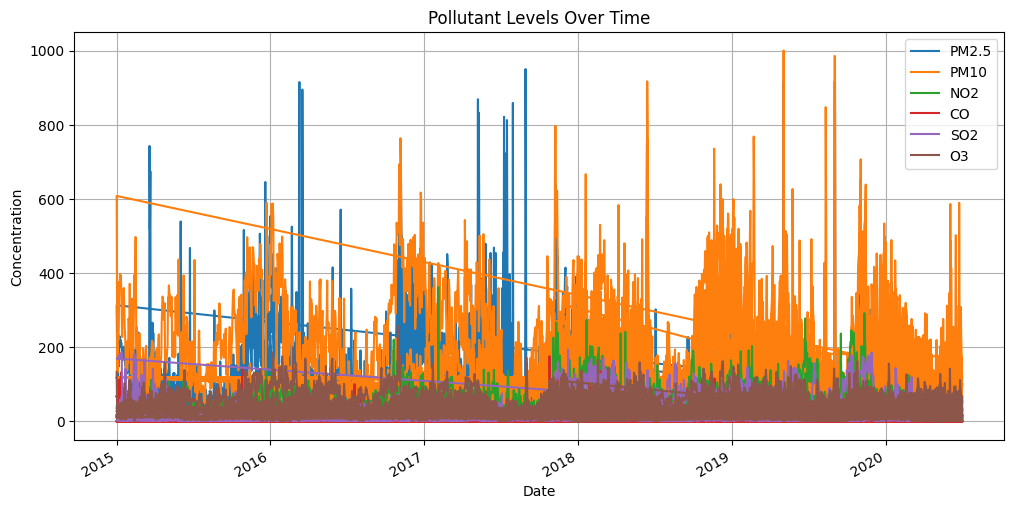

In [8]:
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    
    df[plot_cols].plot(figsize=(12, 6))
    plt.title('Pollutant Levels Over Time')
    plt.xlabel('Date')
    plt.ylabel('Concentration')
    plt.grid(True)
    plt.show()
